In [ ]:
# importando o CSV

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.stats

data_frame = pd.read_csv("campeonato-brasileiro-full.csv")
data_frame.head()

,ID,rodada,data,hora,dia,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_placar,visitante_placar,mandante_estado,visitante_estado,estado_vencedor
0,1,1,2003-03-29,16:00,Sabado,Guarani,Vasco,NaN,NaN,NaN,NaN,Guarani,brinco de ouro,4,2,SP,RJ,SP
1,2,1,2003-03-29,16:00,Sabado,Athletico-PR,Gremio,NaN,NaN,NaN,NaN,Athletico-PR,arena da baixada,2,0,PR,RS,PR
2,3,1,2003-03-30,16:00,Domingo,Flamengo,Coritiba,NaN,NaN,NaN,NaN,-,maracana,1,1,RJ,PR,-
3,4,1,2003-03-30,16:00,Domingo,Goias,Paysandu,NaN,NaN,NaN,NaN,-,serra dourada,2,2,GO,PA,-
4,5,1,2003-03-30,16:00,Domingo,Internacional,Ponte Preta,NaN,NaN,NaN,NaN,-,beira rio,1,1,RS,SP,-


In [ ]:
# Informações gerais

print(data_frame.info)
print(data_frame.shape)
print(data_frame.dtypes)
print(data_frame.isna())

<bound method DataFrame.info of         ID  rodada        data   hora      dia       mandante      visitante  \
0        1       1  2003-03-29  16:00   Sabado        Guarani          Vasco   
1        2       1  2003-03-29  16:00   Sabado   Athletico-PR         Gremio   
2        3       1  2003-03-30  16:00  Domingo       Flamengo       Coritiba   
3        4       1  2003-03-30  16:00  Domingo          Goias       Paysandu   
4        5       1  2003-03-30  16:00  Domingo  Internacional    Ponte Preta   
...    ...     ...         ...    ...      ...            ...            ...   
7640  7641      38  2021-12-12  21:33  Domingo     Bragantino  Internacional   
7641  7642      38  2021-12-12  21:30  Domingo          Sport   Athletico-PR   
7642  7643      38  2021-12-12  21:33  Domingo      Juventude    Corinthians   
7643  7644      38  2021-12-12  21:33  Domingo         Gremio    Atletico-MG   
7644  7645      38  2021-12-12  21:33  Domingo         Santos         Cuiaba   

     fo

In [ ]:
# Descrição básica

data_frame.describe()

,ID,rodada,mandante_placar,visitante_placar
count,7645.000000,7645.000000,7645.000000,7645.000000
mean,3823.000000,20.196207,1.554088,1.027338
std,2207.065737,11.489249,1.234262,1.030366
min,1.000000,1.000000,0.000000,0.000000
25%,1912.000000,10.000000,1.000000,0.000000
50%,3823.000000,20.000000,1.000000,1.000000
75%,5734.000000,30.000000,2.000000,2.000000
max,7645.000000,46.000000,7.000000,7.000000


In [ ]:
# Quantidade de valores nulos por coluna

data_frame.isnull().sum()

ID                       0
rodada                   0
data                     0
hora                     0
dia                      0
mandante                 0
visitante                0
formacao_mandante     4974
formacao_visitante    4974
tecnico_mandante      4610
tecnico_visitante     4610
vencedor                 0
arena                    0
mandante_placar          0
visitante_placar         0
mandante_estado          0
visitante_estado         0
estado_vencedor          0
dtype: int64

In [ ]:
# Remoção de valores nulos

data_frame = data_frame.dropna()
data_frame

,ID,rodada,data,hora,dia,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_placar,visitante_placar,mandante_estado,visitante_estado,estado_vencedor
4730,4741,13,2014-08-03,16:00,Domingo,Chapecoense,Flamengo,4-4-2,4-2-3-1,V. Luxemburgo da Silva,V. Luxemburgo da Silva,Chapecoense,arena conda,1,0,SC,RJ,SC
4797,4808,20,2014-09-10,19:30,Quarta-feira,Palmeiras,Criciuma,4-2-2-2,4-2-3-1,G. Dal Pozzo,G. Dal Pozzo,Palmeiras,estadio municipal paulo machado de carvalho,1,0,SP,SC,SP
4822,4833,22,2014-09-17,22:00,Quarta-feira,Coritiba,Sao Paulo,4-3-2-1,4-4-2,M. Ramalho,M. Ramalho,Coritiba,couto pereira,3,1,PR,SP,PR
4835,4846,23,2014-09-21,18:30,Domingo,Gremio,Chapecoense,4-1-4-1,4-2-3-1,J. da Silva,J. da Silva,Gremio,arena do gremio,1,0,RS,SC,RS
4842,4853,24,2014-09-24,22:00,Quarta-feira,Fluminense,Gremio,4-2-3-1,4-1-4-1,L. Scolari,L. Scolari,-,maracana,0,0,RJ,RS,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7640,7641,38,2021-12-12,21:33,Domingo,Bragantino,Internacional,4-2-3-1,3-4-2-1,D. Aguirre Camblor,D. Aguirre Camblor,Bragantino,nabizao,1,0,SP,RS,SP
7641,7642,38,2021-12-12,21:30,Domingo,Sport,Athletico-PR,4-2-3-1,3-4-2-1,J. Freitas,J. Freitas,-,arena de pernambuco,1,1,PE,PR,-
7642,7643,38,2021-12-12,21:33,Domingo,Juventude,Corinthians,3-4-3,4-3-3,S. Campos Junior,S. Campos Junior,Juventude,alfredo jaconi,1,0,RS,SP,RS
7643,7644,38,2021-12-12,21:33,Domingo,Gremio,Atletico-MG,4-2-3-1,4-2-3-1,A. Stival,A. Stival,Gremio,arena do gremio,4,3,RS,MG,RS


In [ ]:
# Identificação de outliers nas colunas mandante_placar e visitante_placar

import numpy as np
import scipy.stats as spt

numeric_cols = ["mandante_placar", "visitante_placar"]
outlier_indices = []

for col in numeric_cols:
  z_scores = spt.zscore(data_frame[col])
  z_scores = np.array(z_scores)
  outlier_indices = np.where(np.abs(z_scores) > 3)[0]

# Remoção dos outliers
for i in outlier_indices:
  data_frame = data_frame.drop(index=i)

,ID,rodada,data,hora,dia,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_placar,visitante_placar,mandante_estado,visitante_estado,estado_vencedor
450,451,38,2003-10-22,21:40,Quarta-feira,Bahia,Santos,NaN,NaN,NaN,NaN,Santos,fonte nova,4,7,BA,SP,SP
547,548,46,2003-12-14,16:00,Domingo,Bahia,Cruzeiro,NaN,NaN,NaN,NaN,Cruzeiro,fonte nova,0,7,BA,MG,MG
634,635,7,2004-05-23,18:00,Domingo,Corinthians,Athletico-PR,NaN,NaN,NaN,NaN,Athletico-PR,pacaembu,0,5,SP,PR,PR
930,931,32,2004-09-26,16:00,Domingo,Vasco,Palmeiras,NaN,NaN,NaN,NaN,Palmeiras,sao januario,2,5,RJ,SP,SP
977,978,36,2004-10-17,16:00,Domingo,Atletico-MG,Sao Paulo,NaN,NaN,NaN,NaN,Sao Paulo,independencia,0,5,MG,SP,SP
1132,1133,3,2005-05-08,16:00,Domingo,Corinthians,Sao Paulo,NaN,NaN,NaN,NaN,Sao Paulo,pacaembu,1,5,SP,SP,SP
1316,1317,20,2005-08-14,16:00,Domingo,Ponte Preta,Corinthians,NaN,NaN,NaN,NaN,Corinthians,moises lucarelli,3,5,SP,SP,SP
1362,1363,24,2005-09-07,21:45,Quarta-feira,Cruzeiro,Fluminense,NaN,NaN,NaN,NaN,Fluminense,mineirao,2,6,MG,RJ,RJ
1453,1454,32,2005-10-16,16:00,Domingo,Flamengo,Sao Paulo,NaN,NaN,NaN,NaN,Sao Paulo,luso brasileiro,1,6,RJ,SP,SP
1542,1543,40,2005-11-20,18:10,Domingo,Ponte Preta,Palmeiras,NaN,NaN,NaN,NaN,Palmeiras,moises lucarelli,2,6,SP,SP,SP


In [ ]:
# Normalização de colunas numéricas

cols_to_normalize = ['rodada', 'mandante_placar', 'visitante_placar']

for col in cols_to_normalize:
  min_val = data_frame[col].min()
  max_val = data_frame[col].max()
  data_frame[col] = (data_frame[col] - min_val) / (max_val - min_val)


In [20]:
categorical_cols = ['mandante_estado', 'visitante_estado', 'vencedor']
data_frame_encoded = pd.get_dummies(data_frame, columns=categorical_cols)
data_frame_encoded.head()

,ID,rodada,data,hora,dia,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,...,vencedor_Ponte Preta,vencedor_Portuguesa,vencedor_Santa Cruz,vencedor_Santo Andre,vencedor_Santos,vencedor_Sao Caetano,vencedor_Sao Paulo,vencedor_Sport,vencedor_Vasco,vencedor_Vitoria
0,1,0.0,2003-03-29,16:00,Sabado,Guarani,Vasco,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
1,2,0.0,2003-03-29,16:00,Sabado,Athletico-PR,Gremio,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
2,3,0.0,2003-03-30,16:00,Domingo,Flamengo,Coritiba,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
3,4,0.0,2003-03-30,16:00,Domingo,Goias,Paysandu,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
4,5,0.0,2003-03-30,16:00,Domingo,Internacional,Ponte Preta,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False


In [22]:
# Selecionando apenas as colunas de interesse
corr_cols = ['rodada', 'mandante_placar', 'visitante_placar']
corr_matrix = data_frame[corr_cols].corr()

print(corr_matrix)

                    rodada  mandante_placar  visitante_placar
rodada            1.000000         0.031835           0.00095
mandante_placar   0.031835         1.000000           0.05382
visitante_placar  0.000950         0.053820           1.00000


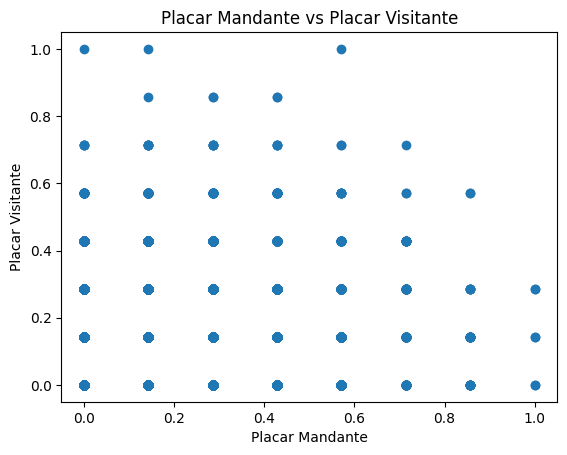

In [24]:
plt.scatter(data_frame['mandante_placar'], data_frame['visitante_placar'])
plt.xlabel('Placar Mandante')
plt.ylabel('Placar Visitante')
plt.title('Placar Mandante vs Placar Visitante')
plt.show()

In [25]:
flamengo_mandante = data_frame[data_frame['mandante'] == 'Flamengo']
flamengo_mandante

,ID,rodada,data,hora,dia,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_placar,visitante_placar,mandante_estado,visitante_estado,estado_vencedor
2,3,0.000000,2003-03-30,16:00,Domingo,Flamengo,Coritiba,NaN,NaN,NaN,NaN,-,maracana,0.142857,0.142857,RJ,PR,-
35,48,0.044444,2003-04-13,18:00,Domingo,Flamengo,Fluminense,NaN,NaN,NaN,NaN,Flamengo,maracana,0.571429,0.142857,RJ,RJ,RJ
50,51,0.088889,2003-04-19,18:00,Sabado,Flamengo,Santos,NaN,NaN,NaN,NaN,Santos,maracana,0.000000,0.285714,RJ,SP,SP
72,73,0.133333,2003-05-03,16:00,Sabado,Flamengo,Vitoria,NaN,NaN,NaN,NaN,Flamengo,maracana,0.285714,0.142857,RJ,BA,RJ
106,107,0.177778,2003-05-18,18:00,Domingo,Flamengo,Guarani,NaN,NaN,NaN,NaN,-,maracana,0.142857,0.142857,RJ,SP,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7546,7557,0.622222,2021-10-30,19:01,Sabado,Flamengo,Atletico-MG,4-2-3-1,4-2-3-1,A. Stival,A. Stival,Flamengo,maracana,0.142857,0.000000,RJ,MG,RJ
7574,7575,0.666667,2021-11-11,19:01,Quinta-feira,Flamengo,Bahia,4-2-3-1,4-2-3-1,A. Ferreira,A. Ferreira,Flamengo,maracana,0.428571,0.000000,RJ,BA,RJ
7593,7604,0.711111,2021-11-17,21:30,Quarta-feira,Flamengo,Corinthians,4-3-3,4-3-3,S. Campos Junior,S. Campos Junior,Flamengo,maracana,0.142857,0.000000,RJ,SP,RJ
7621,7622,0.777778,2021-11-11,20:00,Quinta-feira,Flamengo,Ceara,4-2-3-1,4-2-3-1,T. Retzalff Nunes,T. Retzalff Nunes,Flamengo,maracana,0.285714,0.142857,RJ,CE,RJ


In [26]:
data_frame.to_csv("campeonato-brasileiro-full-clean.csv", index=False)

In [33]:
data_frame['data']

0      2003-03-29
1      2003-03-29
2      2003-03-30
3      2003-03-30
4      2003-03-30
          ...    
7640   2021-12-12
7641   2021-12-12
7642   2021-12-12
7643   2021-12-12
7644   2021-12-12
Name: data, Length: 7645, dtype: datetime64[ns]

In [36]:
data_frame['data'] = pd.to_datetime(data_frame['data'], format='%Y-%m-%d')
data_frame['mes'] = data_frame['data'].dt.month
data_frame['ano'] = data_frame['data'].dt.year

data_frame

,ID,rodada,data,hora,dia,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,...,arena,mandante_placar,visitante_placar,mandante_estado,visitante_estado,estado_vencedor,month,year,mes,ano
0,1,0.000000,2003-03-29,16:00,Sabado,Guarani,Vasco,NaN,NaN,NaN,...,brinco de ouro,0.571429,0.285714,SP,RJ,SP,3,2003,3,2003
1,2,0.000000,2003-03-29,16:00,Sabado,Athletico-PR,Gremio,NaN,NaN,NaN,...,arena da baixada,0.285714,0.000000,PR,RS,PR,3,2003,3,2003
2,3,0.000000,2003-03-30,16:00,Domingo,Flamengo,Coritiba,NaN,NaN,NaN,...,maracana,0.142857,0.142857,RJ,PR,-,3,2003,3,2003
3,4,0.000000,2003-03-30,16:00,Domingo,Goias,Paysandu,NaN,NaN,NaN,...,serra dourada,0.285714,0.285714,GO,PA,-,3,2003,3,2003
4,5,0.000000,2003-03-30,16:00,Domingo,Internacional,Ponte Preta,NaN,NaN,NaN,...,beira rio,0.142857,0.142857,RS,SP,-,3,2003,3,2003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7640,7641,0.822222,2021-12-12,21:33,Domingo,Bragantino,Internacional,4-2-3-1,3-4-2-1,D. Aguirre Camblor,...,nabizao,0.142857,0.000000,SP,RS,SP,12,2021,12,2021
7641,7642,0.822222,2021-12-12,21:30,Domingo,Sport,Athletico-PR,4-2-3-1,3-4-2-1,J. Freitas,...,arena de pernambuco,0.142857,0.142857,PE,PR,-,12,2021,12,2021
7642,7643,0.822222,2021-12-12,21:33,Domingo,Juventude,Corinthians,3-4-3,4-3-3,S. Campos Junior,...,alfredo jaconi,0.142857,0.000000,RS,SP,RS,12,2021,12,2021
7643,7644,0.822222,2021-12-12,21:33,Domingo,Gremio,Atletico-MG,4-2-3-1,4-2-3-1,A. Stival,...,arena do gremio,0.571429,0.428571,RS,MG,RS,12,2021,12,2021
